In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from numpy.linalg import norm
from itertools import count
from IPython import display
import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from utils.helper_util import Func_GaussElimination,plotter

In [58]:
##Wave Propagation
alph=0.005

a=0.4
b=-0.1
c=0.1
## grid
N  = 99 ;
x  = np.linspace(0, 1, N+2)
u_ss=0.4+0.6*x

x  = x[1:N+1] 
dx = x[1] - x[0] 
#Delta
dt=1
t_domain=np.linspace(0, 400, int((400 - 0) / dt + 1))
#initial condition
f0=np.zeros(len(x))
f0=f0.reshape((len(f0),1))
p=(alph*dt)/(dx**2)
q=1-p
var1=(-b/(a*dx-b))-2
var2=c*dt/(dx*(a*dx-b))
A = np.diag((p/2) * np.ones((N-1)), -1) + np.diag(q * np.ones((N)), 0)+ np.diag((p/2) * np.ones((N-1)), +1)
A[0,0]=(1+var1*(p/2))
u_bc=np.zeros((len(x)))
u_bc[0]=(p)*(dx**2)*(var2/dt)
u_bc[-1]=(p)*(1)
u_bc=u_bc.reshape((len(u_bc),1))
B=np.diag((-p/2) * np.ones((N-1)), -1) + np.diag((1+p) * np.ones((N)), 0)+ np.diag((-p/2) * np.ones((N-1)), +1)

B[0,0]=(1-var1*(p/2))
f_new=f0

In [59]:

results_accumulated=[]
xlist=[]

dat_acq_int=1
for it in range(10000):
    u_x_t=np.insert(np.insert(f_new, 0, ((b*f_new[0,0]-dx*c)/(b-dx*a))),len(x)+1,1)
    f_new = Func_GaussElimination(B, A@f_new+u_bc)
    norm_l2 = (norm(u_x_t-u_ss))/(norm(u_ss))
    if norm_l2<1e-3:
        break
    if it%dat_acq_int==0:
        results_accumulated.append(list(u_x_t))
        xlist.append(np.insert(np.insert(x, 0, 0),len(x)+1,1))
#HTML(plotter(xlist,results_accumulated,interv=100,dat_acq=dat_acq_int,p=0,q=1.5).to_html5_video())

In [ ]:
HTML(plotter(xlist,results_accumulated,interv=100,dat_acq=dat_acq_int,p=0,q=1.5).to_html5_video())

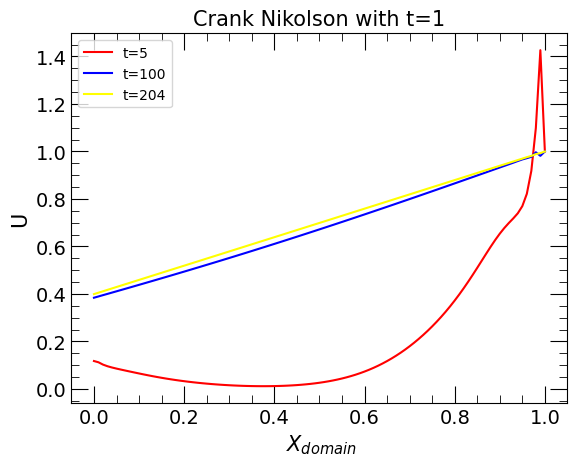

In [63]:
point1=int(5/dt)
point2=int(100/dt)
point3=int(204/dt)

#plt.plot(xlist[point1],results_accumulated[point1],'-k',label='t=5')
plt.plot(xlist[point1],results_accumulated[point1],label='t=5',color='red')
plt.plot(xlist[point2],results_accumulated[point2],label='t=100',color='blue')
#plt.plot(xlist[point2],results_accumulated[point2],'-o',label='t=100')
#plt.plot(xlist[point3],results_accumulated[point3],label='t=204',color='Red')
plt.plot(xlist[point3],results_accumulated[point3],label='t=204',color='Yellow')
plt.xlabel(" $X_{domain}$ ", fontsize='15')
plt.ylabel("U", fontsize='15')
plt.legend()
plt.minorticks_on()
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=14)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in', which='minor', length=6, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in', which='major', length= 12, bottom= True, top= True, left=True, right=True)

plt.title('Crank Nikolson with t=1', fontsize='15')
